In [1]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
def generate_Reyes_features(earthquake_dataset, cutoff_magnitude):
    log_e = np.log10(np.exp(1))
    M_0 = cutoff_magnitude ##cut-off magnitude for this catalog
    earthquake_dataset['b_i'] = log_e/((earthquake_dataset['mag'].rolling(50).mean().shift(1))-M_0)
    
    earthquake_dataset['x_1i']=earthquake_dataset['b_i']-earthquake_dataset['b_i'].shift(4)
    earthquake_dataset['x_2i']=earthquake_dataset['b_i'].shift(4)-earthquake_dataset['b_i'].shift(8)
    earthquake_dataset['x_3i']=earthquake_dataset['b_i'].shift(8)-earthquake_dataset['b_i'].shift(12)
    earthquake_dataset['x_4i']=earthquake_dataset['b_i'].shift(12)-earthquake_dataset['b_i'].shift(16)
    earthquake_dataset['x_5i']=earthquake_dataset['b_i'].shift(16)-earthquake_dataset['b_i'].shift(20)
    
    earthquake_dataset['x_6i'] = np.nan
    earthquake_dataset['just_date'] = earthquake_dataset['time'].dt.date
    for i in range (len(earthquake_dataset)):
        current_date = earthquake_dataset['just_date'].iloc[i]
        minus_one = current_date - datetime.timedelta(1)
        minus_seven = minus_one - datetime.timedelta(7)
        earthquake_dataset['x_6i'].iloc[i] = earthquake_dataset[earthquake_dataset['just_date']>=minus_seven][earthquake_dataset['just_date']<=minus_one]['mag'].mean()
        print(i/len(earthquake_dataset)*100,'%')
      
    earthquake_dataset['x_7i']=np.power(10.0, (-3)*earthquake_dataset['b_i'])
    earthquake_dataset = earthquake_dataset.drop(columns = ["b_i","just_date"])
    return earthquake_dataset

In [3]:
#from google.colab import drive
#drive.mount("/content/drive")

#jika dari dataset github
dataset = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Kaggle/Adeli_Panakkat_Reyes/usgs_japan_1968_2018.csv"
japan_raw = pd.read_csv(dataset)
japan_raw.head()
#df = pd.read_csv(dataset)
#df.head(5)

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,1968-02-25T20:00:32.000Z,37.586,141.650,65.5,5.6,mw,NaN,NaN,NaN,NaN,...,2015-05-13T18:53:01.000Z,"near the east coast of Honshu, Japan",earthquake,NaN,NaN,NaN,NaN,automatic,iscgem,iscgem
1,1968-05-19T04:12:38.000Z,35.626,141.955,20.0,6.3,mw,NaN,NaN,NaN,NaN,...,2015-05-13T18:53:01.000Z,"near the east coast of Honshu, Japan",earthquake,NaN,NaN,NaN,NaN,automatic,iscgem,iscgem
2,1968-07-01T10:45:12.000Z,35.999,139.348,60.6,6.1,mw,NaN,NaN,NaN,NaN,...,2017-04-13T21:43:18.559Z,"near the south coast of Honshu, Japan",earthquake,NaN,NaN,NaN,NaN,automatic,iscgem,iscgem
3,1968-08-08T04:55:10.000Z,36.363,141.587,37.6,5.8,mw,NaN,NaN,NaN,NaN,...,2015-05-13T18:53:02.000Z,"near the east coast of Honshu, Japan",earthquake,NaN,NaN,NaN,NaN,automatic,iscgem,iscgem
4,1969-04-09T12:57:25.000Z,36.825,139.853,110.4,5.7,mw,NaN,NaN,NaN,NaN,...,2015-05-13T18:53:02.000Z,"eastern Honshu, Japan",earthquake,NaN,NaN,NaN,NaN,automatic,iscgem,iscgem


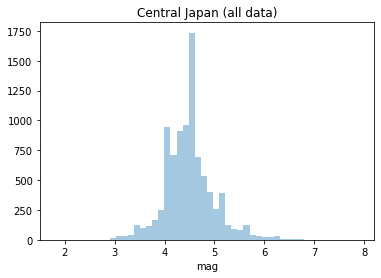

In [4]:
japan_raw['time'] = pd.to_datetime(japan_raw['time'], format='%Y-%m-%dT%H:%M:%S.%fZ')
jp = sns.distplot(japan_raw[japan_raw['mag']>0]['mag'], kde = False).set_title("Central Japan (all data)")

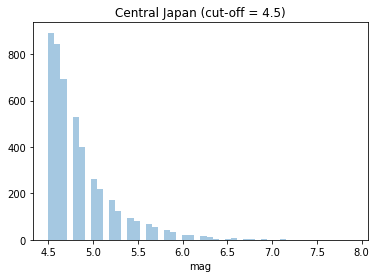

In [5]:
jp = sns.distplot(japan_raw[japan_raw['mag']>=4.5]['mag'], kde = False).set_title("Central Japan (cut-off = 4.5)")

In [6]:
japan_raw=japan_raw.drop(columns = ["id","nst","magType","gap","dmin","rms","net","updated",
                                    "place","type","horizontalError","depthError",
                                    "magError","magNst","status","locationSource","magSource"])
japan_raw.head()

,time,latitude,longitude,depth,mag
0,1968-02-25 20:00:32,37.586,141.650,65.5,5.6
1,1968-05-19 04:12:38,35.626,141.955,20.0,6.3
2,1968-07-01 10:45:12,35.999,139.348,60.6,6.1
3,1968-08-08 04:55:10,36.363,141.587,37.6,5.8
4,1969-04-09 12:57:25,36.825,139.853,110.4,5.7


In [7]:
japan_complete = japan_raw[japan_raw.mag >= 4.5].reset_index(drop = True)

In [8]:
japan_complete = generate_Reyes_features(japan_complete, 4.5)

0.0 %
0.021720243266724587 %
0.043440486533449174 %
0.06516072980017376 %
0.08688097306689835 %
0.10860121633362295 %
0.13032145960034752 %
0.1520417028670721 %
0.1737619461337967 %
0.1954821894005213 %
0.2172024326672459 %
0.23892267593397049 %
0.26064291920069504 %
0.28236316246741966 %
0.3040834057341442 %
0.3258036490008688 %
0.3475238922675934 %
0.36924413553431795 %
0.3909643788010426 %
0.4126846220677671 %
0.4344048653344918 %
0.4561251086012163 %
0.47784535186794097 %
0.4995655951346655 %
0.5212858384013901 %
0.5430060816681147 %
0.5647263249348393 %
0.5864465682015638 %
0.6081668114682884 %
0.629887054735013 %
0.6516072980017376 %
0.6733275412684622 %
0.6950477845351868 %
0.7167680278019114 %
0.7384882710686359 %
0.7602085143353605 %
0.7819287576020852 %
0.8036490008688097 %
0.8253692441355343 %
0.8470894874022589 %
0.8688097306689836 %
0.8905299739357081 %
0.9122502172024326 %
0.9339704604691572 %
0.9556907037358819 %
0.9774109470026064 %
0.999131190269331 %
1.020851433536055

In [9]:
japan_complete.tail()

,time,latitude,longitude,depth,mag,x_1i,x_2i,x_3i,x_4i,x_5i,x_6i,x_7i
4599,2018-12-24 05:42:38.460,34.1498,141.4503,10.00,4.6,-0.170470,-0.088966,-0.037936,2.539536e-01,-0.061354,NaN,0.000006
4600,2018-12-24 09:13:48.470,34.0378,141.6726,10.00,4.5,-0.302644,0.075892,0.000000,1.826162e-01,-0.062399,NaN,0.000005
4601,2018-12-24 23:20:02.810,34.0691,141.5657,10.00,4.7,-0.124905,-0.087376,-0.037237,8.437695e-15,0.219853,NaN,0.000005
4602,2018-12-25 00:10:30.660,34.0316,141.6199,10.00,5.3,-0.014237,-0.156232,-0.126902,7.449305e-02,0.133835,4.95,0.000006
4603,2018-12-31 14:10:25.440,37.4904,141.4337,44.89,5.1,-0.093575,-0.170470,-0.088966,-3.793628e-02,0.253954,5.00,0.000011


In [10]:
japan_grouped = japan_complete.set_index('time')
japan_grouped_parameters = japan_grouped[['x_1i','x_2i','x_3i','x_4i','x_5i','x_6i','x_7i']].resample('M').first()

japan_grouped_maxmag = japan_grouped['mag'].resample('M').max()
japan_grouped = pd.merge(japan_grouped_parameters, japan_grouped_maxmag, how='outer', left_index=True, right_index=True)

japan_grouped.tail()

,x_1i,x_2i,x_3i,x_4i,x_5i,x_6i,x_7i,mag
time,,,,,,,,
2018-08-31,0.084785,-5.995204e-15,-0.162138,0.092064,0.070075,5.000000,4.132226e-06,4.7
2018-09-30,0.330891,-2.824680e-02,0.055604,-0.013570,0.040079,4.500000,6.248750e-07,5.4
2018-10-31,0.018446,-5.638235e-02,0.056382,0.254999,-0.057427,4.500000,9.292492e-07,5.7
2018-11-30,-0.061354,-3.374471e-01,0.085181,0.059667,-0.019510,4.960000,4.132226e-06,4.8
2018-12-31,-0.037936,2.539536e-01,-0.061354,-0.337447,0.085181,4.666667,9.292492e-07,5.6


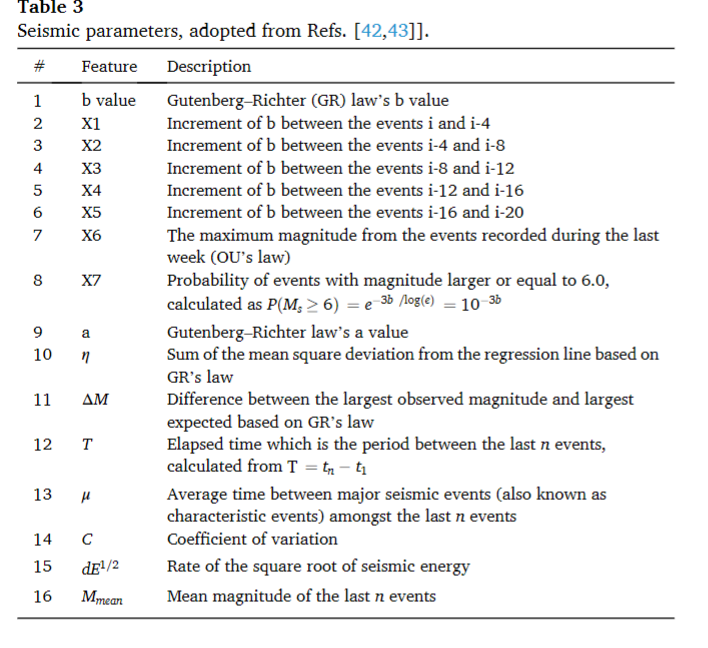